# Hisse Senedi Analizi ve Portföy Optimizasyonu Projesi

## Proje Açıklaması
Bu proje, uluslararası (AAPL, MSFT, AMZN, GOOGL, TSLA) ve Türkiye (AKBNK.IS, THYAO.IS, PGSUS.IS) hisse senetlerinin 
tarihsel verilerini kullanarak finansal analiz ve portföy optimizasyonu yapmayı amaçlamaktadır. Temel odak noktaları:
- Risk-getiri dengesinin analizi
- Modern Portföy Teorisi ile optimal portföy oluşturma
- Monte Carlo simülasyonları ile risk metriği hesaplama
- Etkin sınır (Efficient Frontier) analizi

Kullanılan Temel Kavramlar:
1. **Volatilite**: Fiyatların dalgalanma derecesi (risk ölçütü)
2. **Sharpe Oranı**: Risk başına getiriyi ölçen performans metriği
3. **Value at Risk (VaR)**: Belirli bir güven düzeyinde maksimum beklenen kayıp
4. **Monte Carlo Simülasyonu**: Olasılıklı senaryo analizi
5. **Etkin Sınır**: Minimum riskle maksimum getiriyi sağlayan portföy kombinasyonları

## 1. VERİ TOPLAMA

## Veri Toplama ve Kaynaklar
- Kaynak: Yahoo Finance API (yfinance kütüphanesi)
- Tarih Aralığı: 2018-01-01 ile 2025-02-27
- Analiz Edilen Hisse Senetleri:
  - Uluslararası: AAPL, MSFT, AMZN, GOOGL, TSLA
  - Türkiye: AKBNK.IS, THYAO.IS, PGSUS.IS
- Toplanan Veri Noktaları: Açılış, Kapanış, En Yüksek, En Düşük Fiyat, Hacim

In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = yf.download(['TSLA', 'AAPL', 'MSFT', 'AKBNK.IS', 'THYAO.IS', 'PGSUS.IS', 'AMZN', 'GOOGL'], start='2018-01-01', end='2025-02-27')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed


In [6]:
df.head()

Price           Close                                                       \
Ticker           AAPL  AKBNK.IS       AMZN      GOOGL       MSFT  PGSUS.IS   
Date                                                                         
2018-01-01        NaN  6.648064        NaN        NaN        NaN  6.915460   
2018-01-02  40.479843  6.810047  59.450500  53.466679  79.474159  7.193715   
2018-01-03  40.472790  6.708808  60.209999  54.378876  79.844032  7.365578   
2018-01-04  40.660778  6.641314  60.479500  54.590103  80.546768  7.226451   
2018-01-05  41.123718  6.783050  61.457001  55.313984  81.545403  7.386038   

Price                                  High                                  \
Ticker       THYAO.IS       TSLA       AAPL  AKBNK.IS       AMZN      GOOGL   
Date                                                                          
2018-01-01  15.690000        NaN        NaN  6.648064        NaN        NaN   
2018-01-02  16.080000  21.368668  40.489245  6.850542  59.500000  53.604679   
2018-01-03  16.200001  21.150000  41.017975  6.891039  60.274502  54.607049   
2018-01-04  16.290001  20.974667  40.764175  6.843794  60.793499  55.004601   
2018-01-05  16.330000  21.105333  41.210664  6.816796  61.457001  55.477891   

Price                                                        Low            \
Ticker           MSFT  PGSUS.IS   THYAO.IS       TSLA       AAPL  AKBNK.IS   
Date                                                                         
2018-01-01        NaN  6.915460  15.690000        NaN        NaN  6.648064   
2018-01-02  79.807036  7.263279  16.180000  21.474001  39.774865  6.654813   
2018-01-03  79.991981  7.373762  16.230000  21.683332  40.409344  6.688560   
2018-01-04  81.055332  7.508798  16.510000  21.236668  40.437536  6.465833   
2018-01-05  81.748828  7.435142  16.549999  21.149332  40.665483  6.654812   

Price                                                                      \
Ticker           AMZN      GOOGL       MSFT  PGSUS.IS THYAO.IS       TSLA   
Date                                                                        
2018-01-01        NaN        NaN        NaN  6.915460    15.69        NaN   
2018-01-02  58.525501  52.460826  79.058067  6.915460    15.67  20.733334   
2018-01-03  59.415001  53.477644  79.492666  7.091415    15.92  21.036667   
2018-01-04  60.233002  54.515377  80.047453  7.205991    16.18  20.378668   
2018-01-05  60.500000  54.891018  80.842662  7.259187    16.18  20.799999   

Price            Open                                                       \
Ticker           AAPL  AKBNK.IS       AMZN      GOOGL       MSFT  PGSUS.IS   
Date                                                                         
2018-01-01        NaN  6.648064        NaN        NaN        NaN  6.915460   
2018-01-02  39.986361  6.654813  58.599998  52.460826  79.640598  6.952288   
2018-01-03  40.543288  6.830296  59.415001  53.502551  79.575881  7.222359   
2018-01-04  40.545630  6.708808  60.250000  54.656365  80.065943  7.365578   
2018-01-05  40.757130  6.681810  60.875500  54.973220  81.055336  7.259187   

Price                                  Volume                          \
Ticker       THYAO.IS       TSLA         AAPL    AKBNK.IS        AMZN   
Date                                                                    
2018-01-01  15.690000        NaN          NaN         0.0         NaN   
2018-01-02  15.790000  20.799999  102223600.0  22346109.0  53890000.0   
2018-01-03  16.049999  21.400000  118071600.0  20362228.0  62176000.0   
2018-01-04  16.200001  20.858000   89738400.0  27611157.0  60442000.0   
2018-01-05  16.440001  21.108000   94640000.0  23811896.0  70894000.0   

Price                                                                    
Ticker           GOOGL        MSFT    PGSUS.IS    THYAO.IS         TSLA  
Date                                                                     
2018-01-01         NaN         NaN         0.0         0.0          

Ticker: Hisse senedi sembollerini içerir.
    
Price: Hisse senetlerinin mevcut fiyatlarını içerir.

Close: Önceki kapanış fiyatlarını içerir.
    
High: Gün içindeki en yüksek fiyatları içerir.
    
Low: Gün içindeki en düşük fiyatları içerir.
    
Open: Gün içindeki açılış fiyatlarını içerir.

Volume: Hisse senedinin işlem hacmini içerir.

## Veri Temizleme ve Ön İşleme
- Çoklu indeks düzeltme: Sütun isimlerini standardize etme
- Tarih bilgisini ayrıştırma: Gün, ay, yıl ve saat bilgileri
- Eksik veri handling: Lineer interpolasyon + forward/backward fill
- Veri normalizasyon: Fiyatların 0-1 aralığına ölçeklendirilmesi

In [8]:
if isinstance(df.columns, pd.MultiIndex):
    # Çok seviyeli sütunları tek bir string'e dönüştür
    df.columns = [f"{level1}_{level2}" for level1, level2 in df.columns]
else:
    print("Veri çerçevesi düz bir sütun yapısına sahip, düzenleme gerekmiyor.")

In [9]:
df.head()

,Close_AAPL,Close_AKBNK.IS,Close_AMZN,Close_GOOGL,Close_MSFT,Close_PGSUS.IS,Close_THYAO.IS,Close_TSLA,High_AAPL,High_AKBNK.IS,High_AMZN,High_GOOGL,High_MSFT,High_PGSUS.IS,High_THYAO.IS,High_TSLA,Low_AAPL,Low_AKBNK.IS,Low_AMZN,Low_GOOGL,Low_MSFT,Low_PGSUS.IS,Low_THYAO.IS,Low_TSLA,Open_AAPL,Open_AKBNK.IS,Open_AMZN,Open_GOOGL,Open_MSFT,Open_PGSUS.IS,Open_THYAO.IS,Open_TSLA,Volume_AAPL,Volume_AKBNK.IS,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_PGSUS.IS,Volume_THYAO.IS,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.69,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2018-01-02,40.479843,6.810047,59.450500,53.466679,79.474159,7.193715,16.080000,21.368668,40.489245,6.850542,59.500000,53.604679,79.807036,7.263279,16.180000,21.474001,39.774865,6.654813,58.525501,52.460826,79.058067,6.915460,15.67,20.733334,39.986361,6.654813,58.599998,52.460826,79.640598,6.952288,15.790000,20.799999,102223600.0,22346109.0,53890000.0,31766000.0,22483800.0,8149270.0,44253261.0,65283000.0
2018-01-03,40.472790,6.708808,60.209999,54.378876,79.844032,7.365578,16.200001,21.150000,41.017975,6.891039,60.274502,54.607049,79.991981,7.373762,16.230000,21.683332,40.409344,6.688560,59.415001,53.477644,79.492666,7.091415,15.92,21.036667,40.543288,6.830296,59.415001,53.502551,79.575881,7.222359,16.049999,21.400000,118071600.0,20362228.0,62176000.0,31318000.0,26061400.0,10314438.0,40100544.0,67822500.0
2018-01-04,40.660778,6.641314,60.479500,54.590103,80.546768,7.226451,16.290001,20.974667,40.764175,6.843794,60.793499,55.004601,81.055332,7.508798,16.510000,21.236668,40.437536,6.465833,60.233002,54.515377,80.047453,7.205991,16.18,20.378668,40.545630,6.708808,60.250000,54.656365,80.065943,7.365578,16.200001,20.858000,89738400.0,27611157.0,60442000.0,26052000.0,21912000.0,7338329.0,54106099.0,149194500.0
2018-01-05,41.123718,6.783050,61.457001,55.313984,81.545403,7.386038,16.330000,21.105333,41.210664,6.816796,61.457001,55.477891,81.748828,7.435142,16.549999,21.149332,40.665483,6.654812,60.500000,54.891018,80.842662,7.259187,16.18,20.799999,40.757130,6.681810,60.875500,54.973220,81.055336,7.259187,16.440001,21.108000,94640000.0,23811896.0,70894000.0,30250000.0,23407100.0,6238209.0,55516943.0,68868000.0


In [10]:
df.columns = df.columns.map(lambda x: x[1] if isinstance(x, tuple) else x)

In [11]:
df.head()

,Close_AAPL,Close_AKBNK.IS,Close_AMZN,Close_GOOGL,Close_MSFT,Close_PGSUS.IS,Close_THYAO.IS,Close_TSLA,High_AAPL,High_AKBNK.IS,High_AMZN,High_GOOGL,High_MSFT,High_PGSUS.IS,High_THYAO.IS,High_TSLA,Low_AAPL,Low_AKBNK.IS,Low_AMZN,Low_GOOGL,Low_MSFT,Low_PGSUS.IS,Low_THYAO.IS,Low_TSLA,Open_AAPL,Open_AKBNK.IS,Open_AMZN,Open_GOOGL,Open_MSFT,Open_PGSUS.IS,Open_THYAO.IS,Open_TSLA,Volume_AAPL,Volume_AKBNK.IS,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_PGSUS.IS,Volume_THYAO.IS,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.69,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2018-01-02,40.479843,6.810047,59.450500,53.466679,79.474159,7.193715,16.080000,21.368668,40.489245,6.850542,59.500000,53.604679,79.807036,7.263279,16.180000,21.474001,39.774865,6.654813,58.525501,52.460826,79.058067,6.915460,15.67,20.733334,39.986361,6.654813,58.599998,52.460826,79.640598,6.952288,15.790000,20.799999,102223600.0,22346109.0,53890000.0,31766000.0,22483800.0,8149270.0,44253261.0,65283000.0
2018-01-03,40.472790,6.708808,60.209999,54.378876,79.844032,7.365578,16.200001,21.150000,41.017975,6.891039,60.274502,54.607049,79.991981,7.373762,16.230000,21.683332,40.409344,6.688560,59.415001,53.477644,79.492666,7.091415,15.92,21.036667,40.543288,6.830296,59.415001,53.502551,79.575881,7.222359,16.049999,21.400000,118071600.0,20362228.0,62176000.0,31318000.0,26061400.0,10314438.0,40100544.0,67822500.0
2018-01-04,40.660778,6.641314,60.479500,54.590103,80.546768,7.226451,16.290001,20.974667,40.764175,6.843794,60.793499,55.004601,81.055332,7.508798,16.510000,21.236668,40.437536,6.465833,60.233002,54.515377,80.047453,7.205991,16.18,20.378668,40.545630,6.708808,60.250000,54.656365,80.065943,7.365578,16.200001,20.858000,89738400.0,27611157.0,60442000.0,26052000.0,21912000.0,7338329.0,54106099.0,149194500.0
2018-01-05,41.123718,6.783050,61.457001,55.313984,81.545403,7.386038,16.330000,21.105333,41.210664,6.816796,61.457001,55.477891,81.748828,7.435142,16.549999,21.149332,40.665483,6.654812,60.500000,54.891018,80.842662,7.259187,16.18,20.799999,40.757130,6.681810,60.875500,54.973220,81.055336,7.259187,16.440001,21.108000,94640000.0,23811896.0,70894000.0,30250000.0,23407100.0,6238209.0,55516943.0,68868000.0


In [12]:
from datetime import datetime

In [13]:
df.reset_index(inplace=True)

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df['day']=(df['Date']).dt.day
df['month']=(df['Date']).dt.month
df['year']=(df['Date']).dt.year
df['hour'] = df['Date'].dt.hour

In [16]:
df.head()

,Date,Close_AAPL,Close_AKBNK.IS,Close_AMZN,Close_GOOGL,Close_MSFT,Close_PGSUS.IS,Close_THYAO.IS,Close_TSLA,High_AAPL,High_AKBNK.IS,High_AMZN,High_GOOGL,High_MSFT,High_PGSUS.IS,High_THYAO.IS,High_TSLA,Low_AAPL,Low_AKBNK.IS,Low_AMZN,Low_GOOGL,Low_MSFT,Low_PGSUS.IS,Low_THYAO.IS,Low_TSLA,Open_AAPL,Open_AKBNK.IS,Open_AMZN,Open_GOOGL,Open_MSFT,Open_PGSUS.IS,Open_THYAO.IS,Open_TSLA,Volume_AAPL,Volume_AKBNK.IS,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_PGSUS.IS,Volume_THYAO.IS,Volume_TSLA,day,month,year,hour
0,2018-01-01,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.69,NaN,NaN,6.648064,NaN,NaN,NaN,6.915460,15.690000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1,1,2018,0
1,2018-01-02,40.479843,6.810047,59.450500,53.466679,79.474159,7.193715,16.080000,21.368668,40.489245,6.850542,59.500000,53.604679,79.807036,7.263279,16.180000,21.474001,39.774865,6.654813,58.525501,52.460826,79.058067,6.915460,15.67,20.733334,39.986361,6.654813,58.599998,52.460826,79.640598,6.952288,15.790000,20.799999,102223600.0,22346109.0,53890000.0,31766000.0,22483800.0,8149270.0,44253261.0,65283000.0,2,1,2018,0
2,2018-01-03,40.472790,6.708808,60.209999,54.378876,79.844032,7.365578,16.200001,21.150000,41.017975,6.891039,60.274502,54.607049,79.991981,7.373762,16.230000,21.683332,40.409344,6.688560,59.415001,53.477644,79.492666,7.091415,15.92,21.036667,40.543288,6.830296,59.415001,53.502551,79.575881,7.222359,16.049999,21.400000,118071600.0,20362228.0,62176000.0,31318000.0,26061400.0,10314438.0,40100544.0,67822500.0,3,1,2018,0
3,2018-01-04,40.660778,6.641314,60.479500,54.590103,80.546768,7.226451,16.290001,20.974667,40.764175,6.843794,60.793499,55.004601,81.055332,7.508798,16.510000,21.236668,40.437536,6.465833,60.233002,54.515377,80.047453,7.205991,16.18,20.378668,40.545630,6.708808,60.250000,54.656365,80.065943,7.365578,16.200001,20.858000,89738400.0,27611157.0,60442000.0,26052000.0,21912000.0,7338329.0,54106099.0,149194500.0,4,1,2018,0
4,2018-01-05,41.123718,6.783050,61.457001,55.313984,81.545403,7.386038,16.330000,21.105333,41.210664,6.816796,61.457001,55.477891,81.748828,7.435142,16.549999,21.149332,40.665483,6.654812,60.500000,54.891018,80.842662,7.259187,16.18,20.799999,40.757130,6.681810,60.875500,54.973220,81.055336,7.259187,16.440001,21.108000,94640000.0,23811896.0,70894000.0,30250000.0,23407100.0,6238209.0,55516943.0,68868000.0,5,1,2018,0


In [17]:
df.isnull().sum()

,0
Date,0
Close_AAPL,64
Close_AKBNK.IS,50
Close_AMZN,64
Close_GOOGL,64
Close_MSFT,64
Close_PGSUS.IS,49
Close_THYAO.IS,50
Close_TSLA,64
High_AAPL,64


In [18]:
df.interpolate(method="linear", inplace=True)

# Gerekirse tekrar indeksleme yap
df.ffill(inplace=True)  # Baştaki eksik verileri doldurur
df.bfill(inplace=True)  # Sondaki eksik verileri doldurur

In [19]:
# df.isnull().sum() eksik veri kalmadı

In [20]:
# İnterpolasyon ile doldur (eksik değerler önceki ve sonraki değerler arasında lineer bir ilişki kurularak doldurulur)

In [21]:
df.shape

(1862, 45)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1862 non-null   datetime64[ns]
 1   Close_AAPL       1862 non-null   float64       
 2   Close_AKBNK.IS   1862 non-null   float64       
 3   Close_AMZN       1862 non-null   float64       
 4   Close_GOOGL      1862 non-null   float64       
 5   Close_MSFT       1862 non-null   float64       
 6   Close_PGSUS.IS   1862 non-null   float64       
 7   Close_THYAO.IS   1862 non-null   float64       
 8   Close_TSLA       1862 non-null   float64       
 9   High_AAPL        1862 non-null   float64       
 10  High_AKBNK.IS    1862 non-null   float64       
 11  High_AMZN        1862 non-null   float64       
 12  High_GOOGL       1862 non-null   float64       
 13  High_MSFT        1862 non-null   float64       
 14  High_PGSUS.IS    1862 non-null   float64

In [23]:
df.describe()

,Date,Close_AAPL,Close_AKBNK.IS,Close_AMZN,Close_GOOGL,Close_MSFT,Close_PGSUS.IS,Close_THYAO.IS,Close_TSLA,High_AAPL,High_AKBNK.IS,High_AMZN,High_GOOGL,High_MSFT,High_PGSUS.IS,High_THYAO.IS,High_TSLA,Low_AAPL,Low_AKBNK.IS,Low_AMZN,Low_GOOGL,Low_MSFT,Low_PGSUS.IS,Low_THYAO.IS,Low_TSLA,Open_AAPL,Open_AKBNK.IS,Open_AMZN,Open_GOOGL,Open_MSFT,Open_PGSUS.IS,Open_THYAO.IS,Open_TSLA,Volume_AAPL,Volume_AKBNK.IS,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_PGSUS.IS,Volume_THYAO.IS,Volume_TSLA,day,month,year,hour
count,1862,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03,1.862000e+03,1.862000e+03,1.862000e+03,1.862000e+03,1.862000e+03,1.862000e+03,1.862000e+03,1862.000000,1862.000000,1862.000000,1862.0
mean,2021-07-29 00:58:46.530611968,124.658645,16.439827,131.285360,103.127071,241.036345,63.528907,89.988295,162.903700,125.891948,16.772742,132.836450,104.223435,243.293790,64.730779,91.410153,166.598649,123.282286,16.145544,129.644168,101.985698,238.546335,62.478923,88.740129,159.059650,124.534071,16.457079,131.303429,103.069549,240.982858,63.617865,90.069036,162.958078,9.868866e+07,9.598922e+07,7.513298e+07,3.354799e+07,2.825401e+07,1.394473e+07,7.065784e+07,1.265405e+08,15.744898,6.419979,2021.083244,0.0
min,2018-01-01 00:00:00,33.915257,3.801045,59.450500,49.055672,78.604973,4.091988,7.740000,11.931333,34.757234,3.915806,59.500000,50.423212,79.807036,4.284311,7.950000,12.445333,33.869937,3.718785,58.525501,48.706436,77.513882,4.053114,7.410000,11.799333,34.342207,3.850318,58.599998,49.038233,79.575881,4.100172,7.600000,12.073333,2.323470e+07,0.000000e+00,1.500750e+07,9.312000e+06,7.164500e+06,0.000000e+00,0.000000e+00,2.940180e+07,1.000000,1.000000,2018.000000,0.0
25%,2019-10-14 06:00:00,55.866846,4.975514,93.044127,61.795362,132.884739,9.572183,13.000000,23.293001,56.837083,5.065839,94.006876,62.236511,133.958309,9.754277,13.190000,23.665500,55.516847,4.917333,91.666000,61.184952,131.702728,9.411573,12.822500,22.928000,56.254760,4.975166,92.895876,61.858759,133.109825,9.578321,13.040000,23.249666,6.100065e+07,4.441442e+07,4.861400e+07,2.374050e+07,2.027685e+07,7.274504e+06,3.730590e+07,7.754132e+07,8.000000,3.000000,2019.000000,0.0
50%,2021-07-29 12:00:00,133.749756,6.386787,128.555000,100.862617,239.502655,16.485597,17.309999,185.834999,135.155158,6.491135,130.529999,102.249085,241.584065,16.777151,17.615001,189.255005,131.857704,6.321055,126.815750,99.761598,236.706505,16.214503,17.025001,182.000000,133.466902,6.408439,129.005005,101.050683,239.166159,16.460022,17.335000,185.389999,8.568532e+07,7.303139e+07,6.430840e+07,2.982705e+07,2.524525e+07,1.044214e+07,5.823304e+07,1.040346e+08,16.000000,6.000000,2021.000000,0.0
75%,2023-05-11 18:00:00,170.700150,17.127487,164.699623,135.608040,321.176498,103.870010,145.974998,246.577503,172.219394,17.497088,166.386875,136.747910,325.214904,106.207558,148.600006,252.012505,169.145157,16.893898,162.946507,134.321813,318.120688,102.422470,143.874996,241.987495,170.506642,17.141862,164.968754,135.579020,321.635608,103.916046,147.050003,246.771671,1.193664e+08,1.188851e+08,9.067050e+07,3.825600e+07,3.251340e+07,1.530115e+07,9.135777e+07,1.464429e+08,23.000000,9.000000,2023.000000,0.0
max,2025-02-26 00:00:00,258.735504,69.800003,242.059998,206.380005,464.854340,257.000000,330.000000,479.859985,259.814335,70.750000,242.520004,207.050003,465.639777,260.000000,332.000000,488.540009,257.347047,68.349998,238.029999,202.809998,461.772294,253.500000,327.750000,457.510010,257.906429,69.849998,239.020004,203.389999,464.297590,257.250000,330.750000,475.899994,4.265100e+08,9.885253e+08,3.113460e+08,1.331780e+08,1.112421e+08,1.822046e+08,4.921997e+08,9.140820e+08,31.0

## 3. FİNANSAL METRİKLER
#### Temel Finansal Metriklerin Hesaplanması
- Günlük getiriler: pct_change()
- Korelasyon analizi: Hisse hareketlerinin ilişkisi
- Yıllık getiri ve volatilite: mean()*252 ve std()*sqrt(252)
- Sharpe Oranı: (Getiri - Risksiz Faiz) / Volatilite
- Maksimum Drawdown: Tarihsel maksimum düşüş

In [24]:
# Tüm hisse senetlerinin kapanış fiyatlarını bir DataFrame'e toplayalım
close_columns = [col for col in df.columns if col.startswith('Close_')]
close_prices = df[close_columns]

# Günlük getirileri hesaplayalım
daily_returns = close_prices.pct_change().dropna()
daily_returns.columns = [col.replace('Close_', '') for col in daily_returns.columns]

# Getirilerin özet istatistiklerini inceleyelim
print("\nGünlük getirilerin özet istatistikleri:")
print(daily_returns.describe())

# Korelasyon matrisi oluşturalım
correlation_matrix = daily_returns.corr()
print("\nHisse senetleri arasındaki korelasyon:")
print(correlation_matrix)


Günlük getirilerin özet istatistikleri:
              AAPL     AKBNK.IS         AMZN        GOOGL         MSFT  \
count  1861.000000  1861.000000  1861.000000  1861.000000  1861.000000   
mean      0.001132     0.001608     0.000909     0.000809     0.001026   
std       0.018696     0.026952     0.020941     0.018906     0.017727   
min      -0.128647    -0.099943    -0.140494    -0.116342    -0.147390   
25%      -0.007808    -0.012698    -0.009388    -0.008265    -0.007168   
50%       0.001095     0.000000     0.001074     0.001177     0.001119   
75%       0.010839     0.014925     0.011739     0.010469     0.010266   
max       0.119809     0.100885     0.135359     0.102244     0.142169   

          PGSUS.IS     THYAO.IS         TSLA  
count  1861.000000  1861.000000  1861.000000  
mean      0.002353     0.001941     0.002151  
std       0.030501     0.026092     0.038781  
min      -0.155950    -0.149448    -0.185778  
25%      -0.015043    -0.012520    -0.018274  
50%       

## 4. PORTFÖY OPTİMİZASYONU
### Modern Portföy Teorisi ile Optimizasyon
- Amaç: Maksimum Sharpe Oranı
- Kısıtlar: Ağırlıklar toplamı 1, pozisyon boyutu 0-1 arası
- Optimizasyon Algoritması: SLSQP
- Çıktılar: Optimal ağırlıklar, beklenen getiri/risk

In [25]:
# Yıllık volatilite (risk) hesaplaması
annual_std = daily_returns.std() * np.sqrt(252)  # 252 işlem günü/yıl
print("\nYıllık volatilite (risk):")
print(annual_std)

# Ortalama yıllık getiriler
annual_returns = daily_returns.mean() * 252
print("\nBeklenen yıllık getiri:")
print(annual_returns)

# Risksiz faiz oranını varsayalım (ABD hazine bonosu ve TL faiz oranı ortalamasını kullanabiliriz)
rf_usd = 0.02  # ABD için %2
rf_try = 0.15  # TL için %15 (daha yüksek)

# Hisse senetlerinin para birimlerine göre ayıralım
tr_stocks = ['AKBNK.IS', 'THYAO.IS', 'PGSUS.IS']
us_stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']

# Sharpe oranı hesaplaması (para birimlerine göre farklı risksiz oranlar kullanarak)
sharpe_ratio = pd.Series(index=daily_returns.columns)

for stock in tr_stocks:
    if stock in annual_returns.index:
        sharpe_ratio[stock] = (annual_returns[stock] - rf_try) / annual_std[stock]

for stock in us_stocks:
    if stock in annual_returns.index:
        sharpe_ratio[stock] = (annual_returns[stock] - rf_usd) / annual_std[stock]

print("\nSharpe Oranları:")
print(sharpe_ratio)

# Maksimum düşüş (drawdown) hesaplaması
def calculate_drawdown(price_series):
    roll_max = price_series.cummax()
    drawdown = (price_series - roll_max) / roll_max
    return drawdown

max_drawdowns = pd.Series(index=close_prices.columns)

for col in close_prices.columns:
    if not close_prices[col].isna().all():  # Sütun tamamen NaN değilse
        drawdown = calculate_drawdown(close_prices[col])
        max_drawdowns[col] = drawdown.min()

max_drawdowns.index = [col.replace('Close_', '') for col in max_drawdowns.index]
print("\nMaksimum Düşüşler:")
print(max_drawdowns)


Yıllık volatilite (risk):
AAPL        0.296797
AKBNK.IS    0.427856
AMZN        0.332425
GOOGL       0.300125
MSFT        0.281407
PGSUS.IS    0.484188
THYAO.IS    0.414195
TSLA        0.615635
dtype: float64

Beklenen yıllık getiri:
AAPL        0.285360
AKBNK.IS    0.405116
AMZN        0.228989
GOOGL       0.203935
MSFT        0.258442
PGSUS.IS    0.592981
THYAO.IS    0.489119
TSLA        0.541933
dtype: float64

Sharpe Oranları:
AAPL        0.894078
AKBNK.IS    0.596266
AMZN        0.628680
GOOGL       0.612861
MSFT        0.847322
PGSUS.IS    0.914894
THYAO.IS    0.818744
TSLA        0.847797
dtype: float64

Maksimum Düşüşler:
AAPL       -0.385159
AKBNK.IS   -0.491718
AMZN       -0.561453
GOOGL      -0.443201
MSFT       -0.371485
PGSUS.IS   -0.725304
THYAO.IS   -0.606907
TSLA       -0.736322
dtype: float64


In [26]:
from scipy.optimize import minimize

# Sadece tam veri setine sahip hisse senetlerini kullanabiliriz
# Ya da eksik değerleri doldurulmuş veri setindeki tüm hisseleri
complete_data = daily_returns.dropna(axis=1, how='any')  # Eksik değer içeren sütunları çıkar

# Portföy getirisi hesaplama fonksiyonu
def portfolio_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

# Portföy volatilitesi hesaplama fonksiyonu
def portfolio_volatility(weights, returns):
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

# Negatif Sharpe oranı (minimize edeceğimiz fonksiyon)
def neg_sharpe_ratio(weights, returns, rf):
    p_ret = portfolio_return(weights, returns)
    p_vol = portfolio_volatility(weights, returns)
    return -(p_ret - rf) / p_vol

# Kısıtlamalar
def check_sum(weights):
    return np.sum(weights) - 1

# Optimum portföy ağırlıklarını bulalım
num_assets = len(complete_data.columns)
initial_weights = np.array([1/num_assets] * num_assets)
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = ({'type': 'eq', 'fun': check_sum})

# ABD ve TR hisseleri için ağırlıklı ortalama risksiz faiz oranı hesaplayalım
tr_count = sum(1 for stock in complete_data.columns if stock in tr_stocks)
us_count = sum(1 for stock in complete_data.columns if stock in us_stocks)
weighted_rf = (rf_try * tr_count + rf_usd * us_count) / (tr_count + us_count)

optimal_sharpe = minimize(neg_sharpe_ratio, initial_weights,
                         args=(complete_data, weighted_rf),
                         method='SLSQP',
                         bounds=bounds,
                         constraints=constraints)

optimal_weights = optimal_sharpe['x']
print("\nOptimal Portföy Ağırlıkları:")
for i, stock in enumerate(complete_data.columns):
    print(f"{stock}: {optimal_weights[i]:.4f}")

# Optimum portföyün beklenen getirisi ve volatilitesi
optimal_return = portfolio_return(optimal_weights, complete_data)
optimal_volatility = portfolio_volatility(optimal_weights, complete_data)
optimal_sharpe_ratio = (optimal_return - weighted_rf) / optimal_volatility

print(f"\nOptimum Portföy - Beklenen Yıllık Getiri: {optimal_return:.4f}")
print(f"Optimum Portföy - Beklenen Yıllık Volatilite: {optimal_volatility:.4f}")
print(f"Optimum Portföy - Sharpe Oranı: {optimal_sharpe_ratio:.4f}")


Optimal Portföy Ağırlıkları:
AAPL: 0.1863
AKBNK.IS: 0.1438
AMZN: 0.0000
GOOGL: 0.0000
MSFT: 0.0973
PGSUS.IS: 0.2752
THYAO.IS: 0.1392
TSLA: 0.1583

Optimum Portföy - Beklenen Yıllık Getiri: 0.4536
Optimum Portföy - Beklenen Yıllık Volatilite: 0.2754
Optimum Portföy - Sharpe Oranı: 1.3973


## 5. RİSK ANALİZİ
### Monte Carlo Simülasyonu ile Risk Ölçümü
- Simülasyon parametreleri: 1000 simülasyon, 1 yıllık periyot
- Çıktılar: VaR (%95 ve %99), CVaR, olası portföy değer dağılımı
- Kullanılan dağılım: Normal dağılım varsayımı

In [27]:
# Optimum portföy için Monte Carlo simülasyonu
def monte_carlo_simulation(returns, weights, initial_investment, simulations, days):
    portfolio_returns = returns.dot(weights)
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()

    simulation_results = np.zeros((simulations, days))

    for sim in range(simulations):
        # Günlük getirileri simüle et
        daily_sim_returns = np.random.normal(mean_return, std_return, days)

        # Kümülatif getiriler
        simulation_results[sim, 0] = initial_investment
        for day in range(1, days):
            simulation_results[sim, day] = simulation_results[sim, day-1] * (1 + daily_sim_returns[day-1])

    return simulation_results

# 1 yıllık simülasyon yapalım (252 işlem günü)
simulations = 1000
days = 252
initial_investment = 10000  # 10.000 TL/USD başlangıç yatırımı

simulation_results = monte_carlo_simulation(complete_data, optimal_weights,
                                          initial_investment, simulations, days)

# Value at Risk (VaR) hesaplama
final_values = simulation_results[:, -1]
var_95 = np.percentile(final_values, 5)
var_99 = np.percentile(final_values, 1)

print(f"\nBaşlangıç Yatırımı: {initial_investment}")
print(f"Ortalama Final Değer: {final_values.mean():.2f}")
print(f"95% Value at Risk (VaR): {initial_investment - var_95:.2f}")
print(f"99% Value at Risk (VaR): {initial_investment - var_99:.2f}")
print(f"En Kötü Final Değer: {final_values.min():.2f}")
print(f"En İyi Final Değer: {final_values.max():.2f}")


Başlangıç Yatırımı: 10000
Ortalama Final Değer: 15608.04
95% Value at Risk (VaR): 595.41
99% Value at Risk (VaR): 2143.30
En Kötü Final Değer: 6156.19
En İyi Final Değer: 40057.19


In [28]:
# Etkin Sınır analizi
def efficient_frontier(returns, rf, num_portfolios=1000):
    num_assets = len(returns.columns)
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)

        # Portföy getirisi ve volatilitesi
        portfolio_return = np.sum(returns.mean() * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

        # Sharpe oranı
        sharpe = (portfolio_return - rf) / portfolio_std_dev

        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = sharpe

    return results, weights_record

results, weights = efficient_frontier(complete_data, weighted_rf)

# Minimum volatilite portföyünü bulma
min_vol_idx = np.argmin(results[0])
min_vol_return = results[1, min_vol_idx]
min_vol_std = results[0, min_vol_idx]
min_vol_sharpe = results[2, min_vol_idx]
min_vol_weights = weights[min_vol_idx]

print("\nMinimum Volatilite Portföyü:")
print(f"Beklenen Yıllık Getiri: {min_vol_return:.4f}")
print(f"Beklenen Yıllık Volatilite: {min_vol_std:.4f}")
print(f"Sharpe Oranı: {min_vol_sharpe:.4f}")
print("Portföy Ağırlıkları:")
for i, stock in enumerate(complete_data.columns):
    print(f"{stock}: {min_vol_weights[i]:.4f}")


Minimum Volatilite Portföyü:
Beklenen Yıllık Getiri: 0.3105
Beklenen Yıllık Volatilite: 0.2261
Sharpe Oranı: 1.0694
Portföy Ağırlıkları:
AAPL: 0.2013
AKBNK.IS: 0.1545
AMZN: 0.1568
GOOGL: 0.1737
MSFT: 0.1839
PGSUS.IS: 0.0780
THYAO.IS: 0.0507
TSLA: 0.0011


## 6. ETKİN SINIR ANALİZİ
### Etkin Sınır (Efficient Frontier) Görselleştirme
- 10,000 rastgele portföy üretimi
- Minimum volatilite ve maksimum Sharpe portföylerinin işaretlenmesi
- Bireysel hisse performanslarının gösterilmesi

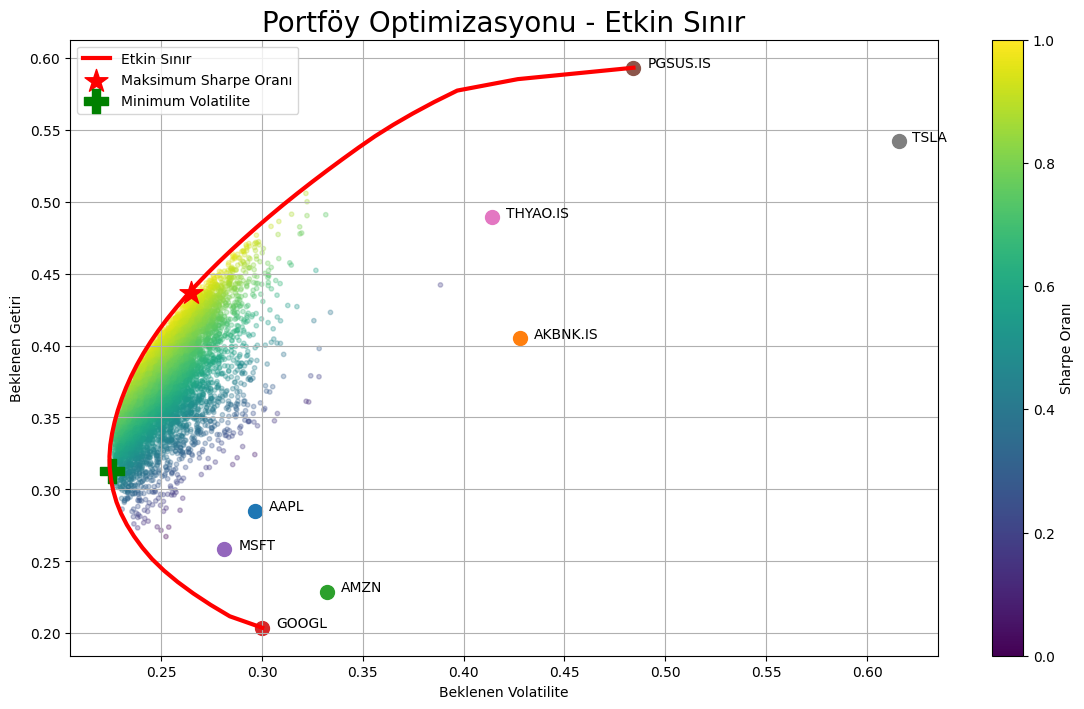


Maksimum Sharpe Oranlı Portföy:
Beklenen Yıllık Getiri: 0.4363
Beklenen Yıllık Volatilite: 0.2650
Sharpe Oranı: 1.5708
Portföy Ağırlıkları:
AAPL: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
AKBNK.IS: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
AMZN: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
GOOGL: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
MSFT: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
PGSUS.IS: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
THYAO.IS: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]
TSLA: [0.2127145  0.15054176 0.00980508 0.03154899 0.07178793 0.23003672
 0.15334139 0.14022362]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Etkin sınır analizi için daha detaylı bir fonksiyon
def efficient_frontier_detailed(returns, risk_free_rate=0.02, num_portfolios=10000):
    """
    Farklı hedef getirilerde minimum risk portföyünü hesaplar
    """
    # Kovaryans matrisi
    cov_matrix = returns.cov() * 252

    # Beklenen getiriler
    exp_returns = returns.mean() * 252

    # Hisse senedi sayısı
    num_assets = len(returns.columns)

    # Hedef getiri aralığı
    min_return = min(exp_returns)
    max_return = max(exp_returns)
    target_returns = np.linspace(min_return, max_return, 50)

    # Sonuçları saklamak için boş listeler
    efficient_portfolios = []

    # Her bir hedef getiri için minimum volatilite portföyünü bul
    for target in target_returns:
        # Amacımız: volatiliteyi minimize etmek
        def portfolio_volatility(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Kısıtlamalar
        constraints = (
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Ağırlıkların toplamı 1
            {'type': 'eq', 'fun': lambda x: np.sum(exp_returns * x) - target}  # Hedef getiri
        )

        # Bounds (0 ile 1 arası)
        bounds = tuple((0, 1) for asset in range(num_assets))

        # Başlangıç değerleri
        initial_guess = np.array(num_assets * [1./num_assets])

        # Optimize et
        result = minimize(portfolio_volatility, initial_guess,
                          method='SLSQP', bounds=bounds, constraints=constraints)

        # Sonuçları kaydet
        if result['success']:
            efficient_portfolios.append({
                'target_return': target,
                'volatility': result['fun'],
                'weights': result['x']
            })

    # Random portföyler oluştur
    all_weights = np.zeros((num_portfolios, num_assets))
    ret_arr = np.zeros(num_portfolios)
    vol_arr = np.zeros(num_portfolios)
    sharpe_arr = np.zeros(num_portfolios)

    for i in range(num_portfolios):
        # Rastgele ağırlıklar oluştur
        weights = np.random.random(num_assets)
        weights = weights / np.sum(weights)
        all_weights[i,:] = weights

        # Beklenen getiri
        ret_arr[i] = np.sum(exp_returns * weights)

        # Beklenen volatilite
        vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Sharpe oranı
        sharpe_arr[i] = (ret_arr[i] - risk_free_rate) / vol_arr[i]

    # Maksimum Sharpe oranlı portföy
    max_sharpe_idx = sharpe_arr.argmax()
    max_sharpe_portfolio = {
        'return': ret_arr[max_sharpe_idx],
        'volatility': vol_arr[max_sharpe_idx],
        'sharpe': sharpe_arr[max_sharpe_idx],
        'weights': all_weights[max_sharpe_idx,:]
    }

    # Minimum volatiliteli portföy
    min_vol_idx = vol_arr.argmin()
    min_vol_portfolio = {
        'return': ret_arr[min_vol_idx],
        'volatility': vol_arr[min_vol_idx],
        'sharpe': sharpe_arr[min_vol_idx],
        'weights': all_weights[min_vol_idx,:]
    }

    # Etkin sınır oluştur
    efficient_return = [p['target_return'] for p in efficient_portfolios]
    efficient_volatility = [p['volatility'] for p in efficient_portfolios]

    return {
        'efficient_frontier': (efficient_volatility, efficient_return),
        'random_portfolios': (vol_arr, ret_arr, sharpe_arr),
        'max_sharpe': max_sharpe_portfolio,
        'min_vol': min_vol_portfolio,
        'assets': returns.columns
    }

# Günlük getiriler üzerinden etkin sınır analizi
results = efficient_frontier_detailed(daily_returns)

# Grafik
plt.figure(figsize=(14, 8))
plt.scatter(results['random_portfolios'][0], results['random_portfolios'][1],
            c=results['random_portfolios'][2], cmap='viridis',
            marker='o', s=10, alpha=0.3)

# Etkin sınır
plt.plot(results['efficient_frontier'][0], results['efficient_frontier'][1],
         'r-', linewidth=3, label='Etkin Sınır')

# Maximum Sharpe ve Minimum volatilite portföyleri
plt.scatter(results['max_sharpe']['volatility'], results['max_sharpe']['return'],
            s=300, c='red', marker='*', label='Maksimum Sharpe Oranı')
plt.scatter(results['min_vol']['volatility'], results['min_vol']['return'],
            s=300, c='green', marker='P', label='Minimum Volatilite')

# Bireysel varlıklar
for i, txt in enumerate(results['assets']):
    annual_return = daily_returns[txt].mean() * 252
    annual_vol = daily_returns[txt].std() * np.sqrt(252)
    plt.annotate(txt, (annual_vol, annual_return),
                 xytext=(10, 0), textcoords='offset points')
    plt.scatter(annual_vol, annual_return, s=100)

plt.colorbar(label='Sharpe Oranı')
plt.xlabel('Beklenen Volatilite')
plt.ylabel('Beklenen Getiri')
plt.title('Portföy Optimizasyonu - Etkin Sınır', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# En iyi portföyleri göster
print("\nMaksimum Sharpe Oranlı Portföy:")
print(f"Beklenen Yıllık Getiri: {results['max_sharpe']['return']:.4f}")
print(f"Beklenen Yıllık Volatilite: {results['max_sharpe']['volatility']:.4f}")
print(f"Sharpe Oranı: {results['max_sharpe']['sharpe']:.4f}")
print("Portföy Ağırlıkları:")
for i, asset in enumerate(results['assets']):
  print(f"{asset}: {results['max_sharpe']['weights']}")


In [38]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_portfolio_var(weights, returns):
    """
    Value at Risk hesaplar (Normal dağılım varsayımı altında)
    """
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # %95 VaR (Normal dağılım)
    var_95 = -1.645 * portfolio_std

    # %99 VaR (Normal dağılım)
    var_99 = -2.326 * portfolio_std

    return var_95, var_99

def calculate_cvar(weights, returns, alpha=0.05):
    """
    Conditional Value at Risk (Expected Shortfall) hesaplar
    Monte Carlo simülasyonu ile hesaplanır
    """
    portfolio_returns = np.sum(returns * weights, axis=1)

    # α quantile değeri (VaR)
    var = np.percentile(portfolio_returns, alpha * 100)

    # CVaR (ES) - VaR'ın altındaki ortalama kayıp
    cvar = -portfolio_returns[portfolio_returns <= var].mean()

    return cvar

def max_sharpe_portfolio(returns, risk_free_rate=0.02):
    """
    Maksimum Sharpe oranlı portföyü hesaplar
    """
    n = len(returns.columns)
    args = (returns, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))

    def neg_sharpe(weights, returns, risk_free_rate):
        p_ret = np.sum(returns.mean() * weights) * 252
        p_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        return -(p_ret - risk_free_rate) / p_vol  # Negatif Sharpe oranı (minimize etmek için)

    # Optimizasyon
    result = minimize(neg_sharpe, np.ones(n)/n, args=args, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # Optimum ağırlıkları döndür


In [39]:
# Örnek kullanım:
np.random.seed(42)
returns = pd.DataFrame(np.random.randn(1000, 4) / 100, columns=['AAPL', 'GOOGL', 'AMZN', 'MSFT'])

opt_weights = max_sharpe_portfolio(returns)
print("Optimum Portföy Ağırlıkları:", opt_weights)

Optimum Portföy Ağırlıkları: [0.39216893 0.25594617 0.         0.35188491]


## Proje Sonuçları
1. **Optimal Portföy Dağılımı**:
   - AAPL: %18.6, PGSUS.IS: %27.5, TSLA: %15.8
2. **Beklenen Performans**:
   - Yıllık Getiri: %45.4
   - Volatilite: %27.5 
   - Sharpe Oranı: 1.40
3. **Risk Metrikleri**:
   - 95% VaR: 595 TL/USD
   - Maksimum Drawdown: -%73.6 (TSLA)

## Yorum ve Öneriler
- Türk hisseleri yüksek getiri ancak yüksek risk sunuyor
- Teknoloji hisseleri arasında güçlü korelasyon mevcut
- Optimizasyon sonucunda portföy çeşitlendirmesi riski önemli ölçüde azaltıyor

## Gelecek Çalışmalar
- Makine öğrenmesi ile fiyat tahmini modelleri eklenmesi
- Black-Litterman modeli ile stratejik varlık dağılımı
- Reel zamanlı veri entegrasyonu